# Analyze 2012-2016 Revenue Performance

In this project, I created a Python script for analyzing the financial records of Bank.


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends.


## Data Sources:
* revenue_2009_2016.csv : Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)





### Task is to create a Python script that analyzes the records to calculate each of the following:

- The total number of months included in the dataset.

- The total amount of revenue gained over the entire period.

- The average change in revenue between months over the entire period.

- The greatest increase in revenue (date and amount) over the entire period.

- The greatest decrease in revenue (date and amount) over the entire period.


### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib.


---

### Import Libraries

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#prettify the plot using seaborn package
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12,6)

### Prettify Tables

In [4]:
#apply style function to highlight profit losses
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [5]:
#apply style function to highlight max values
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [6]:
#apply style function to highlight max values
def highlight_min(s):
    '''
    highlight the minimum in a Series pink.
    '''
    is_min = s == s.min()
    return ['background-color: pink' if v else '' for v in is_min]

### Load Data

In [7]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [8]:
#set display typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [9]:
#load data
#parse the date to datetime format
#set index to date

df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')
df[:5].T

Date,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00
Revenue,"943,690","1,062,565","210,079","-735,286","842,933"


In [10]:
df.dtypes

Revenue    float64
dtype: object

In [11]:
df.memory_usage(deep=True)

Index      688
Revenue    688
dtype: int64

## Exploratory Data Analysis (EDA)

In [12]:
# statistically described the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


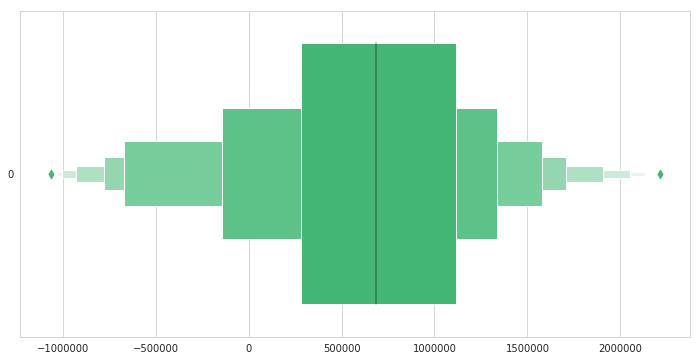

In [13]:
#use boxenplot to see the data
ax = sns.boxenplot(data=df['Revenue'], orient='h', color='#2ecc71')

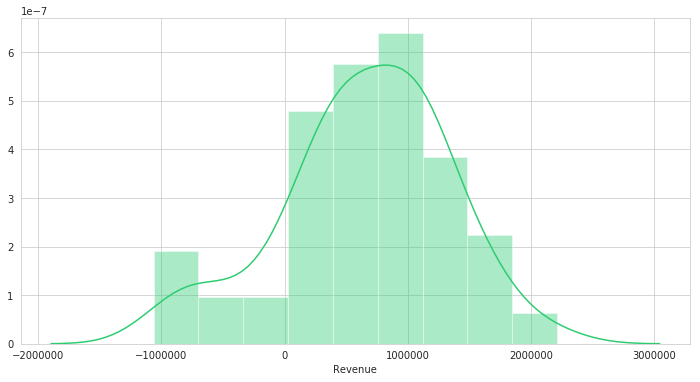

In [14]:
#plot the distribution
ax= sns.distplot(df['Revenue'], color='#2ecc71')

### Monthly Revenue Across the Years

- Find out what months are profitable and months that have revenue losses.

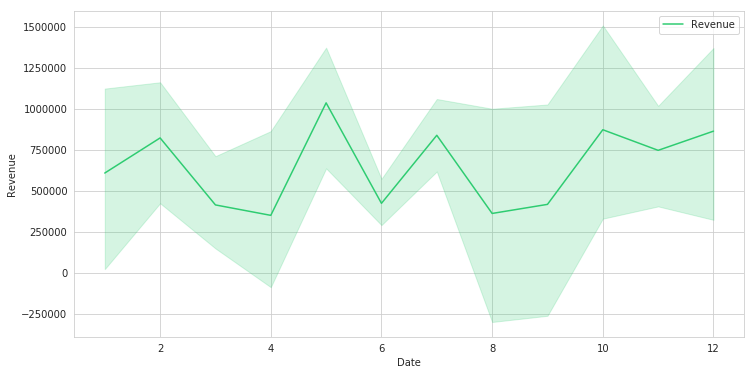

In [15]:
#plot the Monthly Revenue Averages to determine overall monthly comparison performance
ax=sns.lineplot(df.index.month,df['Revenue'],color='#2ecc71', label='Revenue')

> Month of February, May, July, October and December are high grossers year to year since 2009 to 2016. This looks like these months revenue performance coincides with major US holidays.

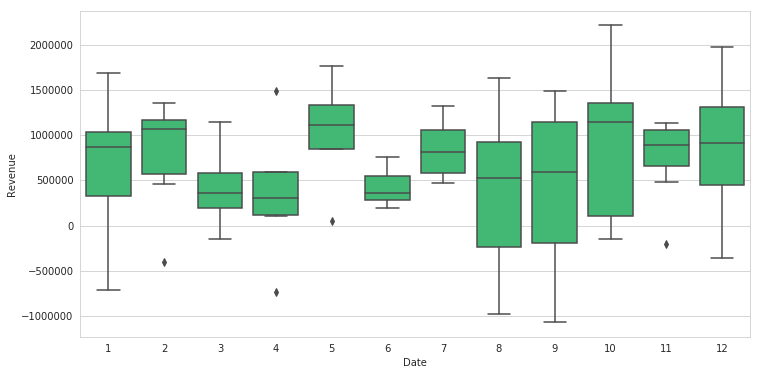

In [16]:
# See revenue variation across months
ax=sns.boxplot(df.index.month, df.Revenue,color='#2ecc71')

> In this plot, we can see the variation of revenues across different months since 2009 t0 2016.

---

### Monthly Revenues

- Find-out what Year has the best Monthly Revenue so far.

In [17]:
# Monthly Revenues Across multiyear
dfm=df.pivot_table(index=[df.index.month, df.index.year]).rename_axis(['month','year'])
dfm.style.applymap(color_negative_red).apply(highlight_max).apply(highlight_min)

In [18]:
print('Highest monthly Revenue of $%.2f recorded on %s/%s.' %(dfm.Revenue.max(),dfm.Revenue.idxmax()[0], dfm.Revenue.idxmax()[1] ))
print('Biggest monthly Loss of $%.2f recorded on %s/%s.' %(dfm.Revenue.min(),dfm.Revenue.idxmin()[0], dfm.Revenue.idxmin()[1] ))

Highest monthly Revenue of $2211086.00 recorded on 10/2012.
Biggest monthly Loss of $-1063151.00 recorded on 9/2010.


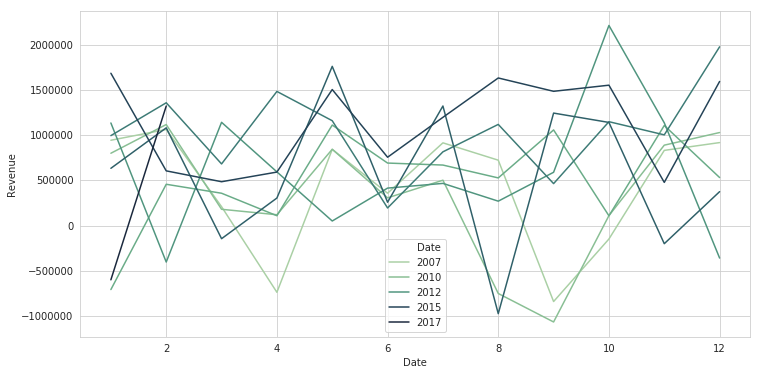

In [19]:
# Plot the monthly revenues per year
ax=sns.lineplot(y='Revenue', x=df.index.month,hue=df.index.year,data=df,palette="ch:r=-.5,l=.75")

> This plot is a consolidation of all the monthly revenues series for the past 6 years. Although this gives us insights about the revenue performance of the bank, we can still summarized the financial record in  a more consolidated manner through a table that will show us more intuitive insights about our financial history.

In [20]:
# Monthly Revenues across multi-year
dfmm = df.pivot_table(index=df.index.month, aggfunc=(np.mean,np.sum, min, max))
dfmm.index.rename('month', inplace=True)
dfmm.style.applymap(color_negative_red).apply(highlight_max).apply(highlight_min)

> On this table, I apply styling technique on the table like applying red-font colorization when its a Loss and highlighting to empahasized Max Revenue.


> May, June, and July didn't record any revenue losses since 2009 up to 2016.

> **Best Month: May | Least Month: April**

---

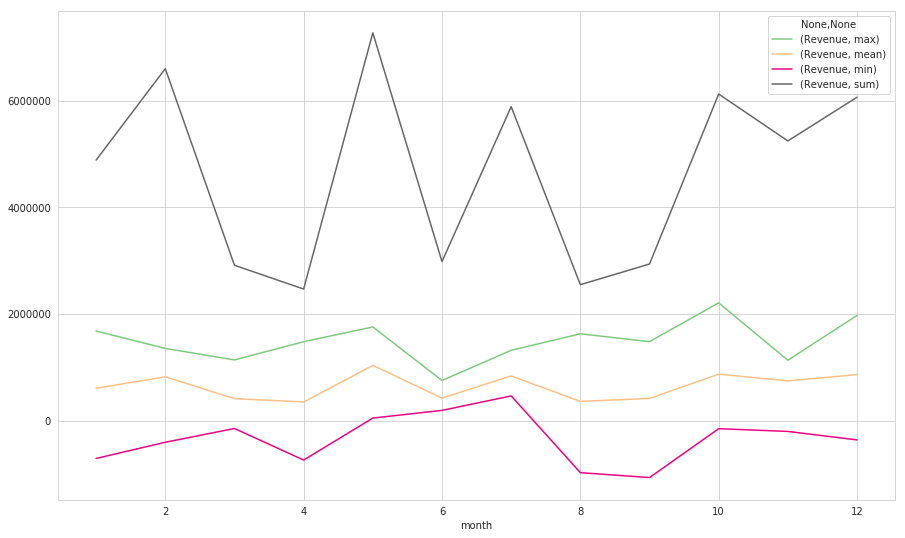

In [21]:
#monthly revenues on every month across the years
# with this plot, it becomes easy to confirm which month of the year is the most profitable

ax=dfmm.plot(kind='line', colormap='Accent', figsize=(15,9))

> Month of May is the BEST-Month for the bank in terms of gross and average revenue since 2009 up to 2016.

### Quarterly Revenue Across the Years

- Find-out what Quarter had the Highest Gross Revenue since 2009 to 2016.

> Let us compare the revenue performance like what is the best profitable quarter.


### Quarterly Revenue Year per Year

In [22]:
#only include years where complete revenue recorded for the whole year
df = df['2009':'2015']

In [23]:
# Revenue per Quarter across multi-year
dfq = df.pivot_table(index=[df.index.year,df.index.quarter], 
                     aggfunc=(np.mean, np.sum, min,max)).rename_axis(['year','quarter'])

#drop the the entry for 2016 since its not a complete quarter
#dfq = dfq.iloc[0:28,:]
dfq.style.applymap(color_negative_red).apply(highlight_max).apply(highlight_min)

In [24]:
# Get the Min/Max Quarterly Revenue
QHrev= dfq.Revenue.max()[3]
QHLoss = dfq.Revenue.min()[3]
Qmax = max(dfq.idxmax())
Qmin = min(dfq.idxmin())

print('Highest Grossing Quarterly Revenue of $%.0f was observed on the %s %s-quarter.' %(QHrev,Qmax[0], Qmax[1] ))
print('Biggest Quarterly Loss of $%.00f was observed on the %s %s-quarter.' %(QHLoss,Qmin[0], Qmin[1] ))

Highest Grossing Quarterly Revenue of $4312011 was observed on the 2015 3-quarter.
Biggest Quarterly Loss of $-1309489 was observed on the 2010 3-quarter.


In [25]:
#Quarterly Revenues across multi-year
dfqq = df.pivot_table(index=df.index.quarter, aggfunc=(np.mean, np.sum, min, max)).rename_axis('quarter')
dfqq.style.applymap(color_negative_red).apply(highlight_max).apply(highlight_min)

In [26]:
print('The %sth Quarter is the most profitable quarter with a Quarterly Average Revenue of $%0.2f and total quarterly revenue of $%0.2f.' \
      %(max(dfqq.idxmax()),dfqq.Revenue.max()[1], dfqq.Revenue.max()[3]))

The 4th Quarter is the most profitable quarter with a Quarterly Average Revenue of $830302.95 and total quarterly revenue of $17436362.00.


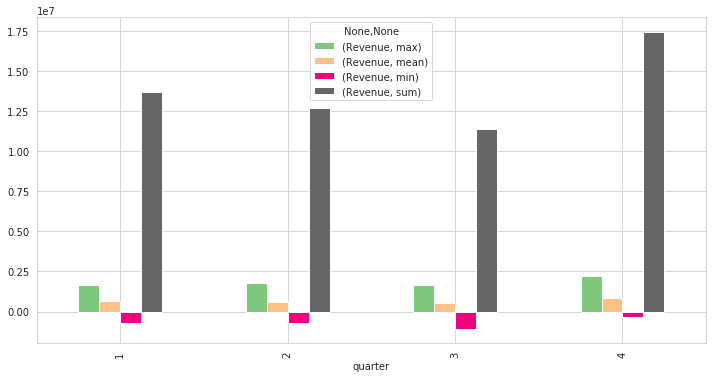

In [27]:
#compare bank revenues per quarter
dfqq.plot(kind='bar', colormap='Accent')

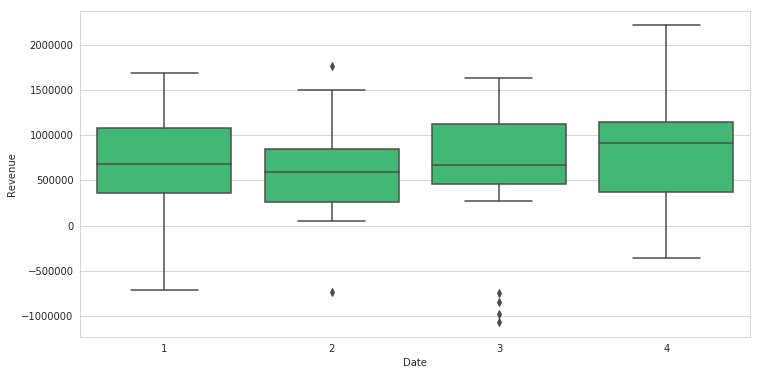

In [28]:
#plot the monthly revenues per year
ax=sns.boxplot(y='Revenue', x=df.index.quarter,data=df,color='#2ecc71')

- Now we know that 4th quarter is the most profitable period in terms of revenue averages.  Although records show that the 3rd quarter of 2015 observed the highest Gross Revenue of ```$2,490,909```, it is also on 3rd quarter of 2010 that experienced a heavy quarterly loss of ```$1,309,489```.


- 1st and 2nd quarter have no significant difference and follows the 4th quarter leader in terms of performance.




---

### Yearly Revenue Across the Years

- Find-out the Highest Grossing Revenue Year since 2009 to 2016.


In [29]:
dfyy = df.pivot_table(index=df.index.year, aggfunc=(np.mean,np.sum, min, max)).rename_axis('year')
dfyy.style.applymap(color_negative_red).apply(highlight_max).apply(highlight_min)

In [30]:
# Highest Grossing year
ymax = dfyy.idxmax()[3]
rmax = dfyy.max()[1]
rmaxt = dfyy.max()[3]
print("%s is the Highest Grossing Year in terms of Revenue Average and Total, $%0.2f and $%0.2f respectively." %(ymax,rmax,rmaxt))

2015 is the Highest Grossing Year in terms of Revenue Average and Total, $1130070.17 and $13560842.00 respectively.


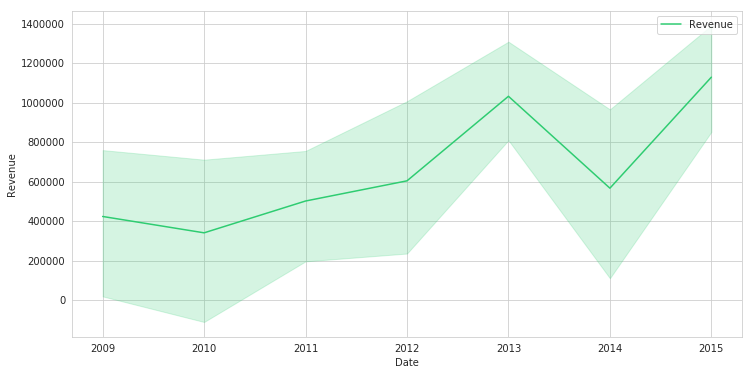

In [31]:
#plot the yearly avg revenues to determine yearly overall performance
ax=sns.lineplot(df.index.year,df['Revenue'],color='#2ecc71', label='Revenue')

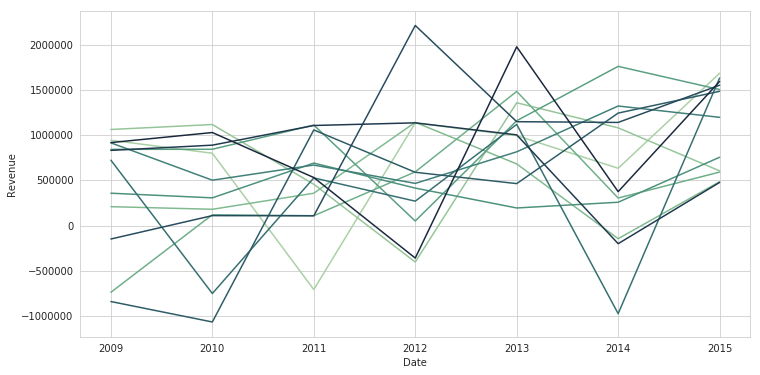

In [32]:
# Plot the revenues for different months and years
ax=sns.lineplot(y='Revenue', x=df.index.year,hue=df.index.month,data=df,palette="ch:r=-.5,l=.75", legend=False)

> 2013 and 2015 are high revenue grossing years. No monthly losses recorded on these years.

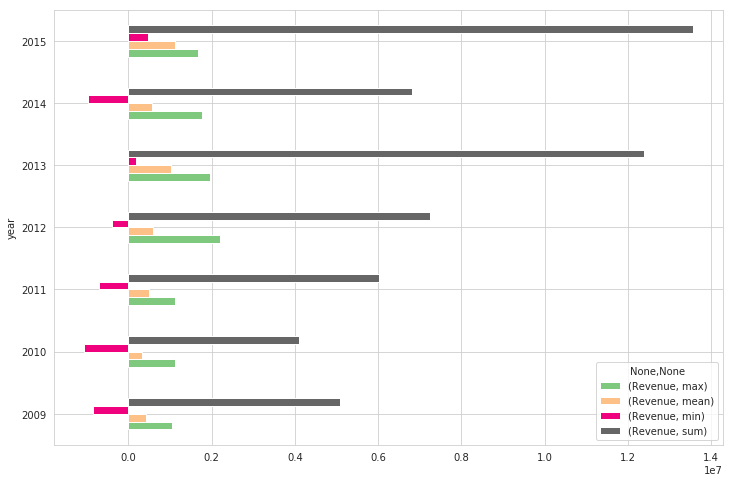

In [33]:
#yearly revenues
# with this plot, it becomes to easy to confirm which month of the year is the most profitable

ax=dfyy.plot(kind='barh', colormap='Accent', figsize=(12,8))

> 2013 and 2015 are the only years with no reported revenue losses and 2010 recorded the biggest revenue loss.

> 2015 is the highest grossing year in terms of revenue averages and total.

---